# TODO:

 - how to use a commong style ?
 - remove local file paths
 - Import/Provide different models
 - Compare plot with:
   - oblivious
   - lightGBM
   - xgboost
   - primi alberi di un modello (quickrank) contro tutti gli alberi
 - aggiugnere 0

# Topological Analysis

**RankEval** provides topological analysis tools that allow to investigate the shape of a tree-based ensemble. Model shape may unveil possible overfitting behaviours and it may highlight interesting differences among learning algorithms.

In [1]:
# import common libraries
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np

##### Import RankEval topological analysis and visualization packages

In [2]:
from rankeval.analysis.topological import topological_analysis
from rankeval.model import RTEnsemble
from rankeval.visualization.topological import plot_tree_shape

##### Load models from file

In [3]:
# files
qr_1K_file  = "/home/rankeval/rankeval_data/msn/models/Fold1/msn1.quickrank.LAMBDAMART.20000.32.T1000.xml"
lgbm_1K_file   = "/home/rankeval/rankeval_data/msn/models/Fold1/msn1.lightgbm.LAMBDAMART.1000.32.T1000.model"

# load
qr_1K   = RTEnsemble(qr_1K_file, name="QuickRank.1k", format="QuickRank")
lgbm_1K = RTEnsemble(lgbm_1K_file, name="LGBM.1k", format="LightGBM")

##### Performing the topological analysis

The method `TopologicalAnalysisResult` computes the topological properties of the given ensemble. It may include or discard tree leaves from the analysis. It returns new object containing:
 - **tree heights**: returns a `scipy` `DescribeResult` object which contains the minimum, maximum, mean depth, etc, of the tree in the given ensemble.
 - **fullness per level**: for each tree level $l$, returns the average number of nodes in the $l$-th level across the whole ensemble divided by $2^l$, where $2^l$ is the maximum possible number of nodes.
 - **average tree shape**: returns a sparse matrix *S*, with *max_depth* rows and *max_nodes* columns. Tree levels, denoted with *l*, are numbered from *0* to *max_depth*. Within each tree level *l*, nodes, denoted with *n*, are numbered left-to-right from *0* to $2^l$. The matrix element *S[l,n]* stores the fraction of trees in the ensemble that have node with id *n* at depth *l*.

In [9]:
# compute analysis
qr_1K_stats = topological_analysis(qr_1K, include_leaves=False)

# tree heights
print "Tree heights:"
print qr_1K_stats.describe_tree_height()
print

# fullness per level
print "Average fullness per level:"
print "Level | Avg. Fullness"
for level,fullness in enumerate (qr_1K_stats.fullness_per_level()):
    if level<10:
        print "%5d | %.2f" % (level, fullness)
print "  ... | ...."
print

# Average tree shape
avg_ts = qr_1K_stats.avg_tree_shape()
print "Average tree shape:"
for level in range (min(5,avg_ts.shape[0])):
    print "%5d | " % (level),
    for node in [n for n in range(2**level)]:
        print " %.2f" % (avg_ts[level,node]),
    print
print "  ... |   ....  ...."

Tree heights:
DescribeResult(nobs=1000, minmax=(8, 31), mean=28.116, variance=27.383927927927928, skewness=-1.8538981662456424, kurtosis=2.481285911631188)

Average fullness per level:
Level | Avg. Fullness
    0 | 1.00
    1 | 0.56
    2 | 0.30
    3 | 0.16
    4 | 0.08
    5 | 0.04
    6 | 0.02
    7 | 0.01
    8 | 0.01
    9 | 0.01
  ... | ....

Average tree shape:
    0 |   1.00
    1 |   0.93  0.20
    2 |   0.89  0.10  0.11  0.10
    3 |   0.86  0.08  0.06  0.05  0.08  0.03  0.04  0.06
    4 |   0.83  0.07  0.06  0.03  0.04  0.01  0.02  0.02  0.07  0.00  0.01  0.01  0.02  0.01  0.02  0.04
  ... |   ....  ....


### Visualization of Average Tree Shape

**RankEval** provides a specific utility for the visualization of the average tree shape.

In the plot below, the root is represented by the semi-circle at the center of the figure.
Its left and right children are represented left-to-right by two adjacent quarter-circles at tree level 1.
Recursively, the two quadrants illustate the left and right sub-trees of the root.
At each tree level $l$, there are $2^l$ circular trapezoids corresponding to the nodes of a complete tree in left-to-right order.

The color intensity of each circular trapezoid is proportional number of trees that contain the corresponding node.

The model illustrated below is highly imbalanbced towards the left-most path.

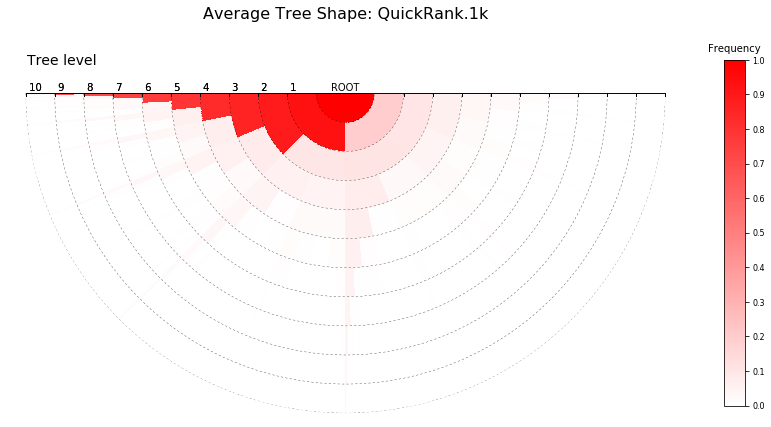

In [10]:
fig, ax = plot_tree_shape(qr_1K_stats, max_level=10)

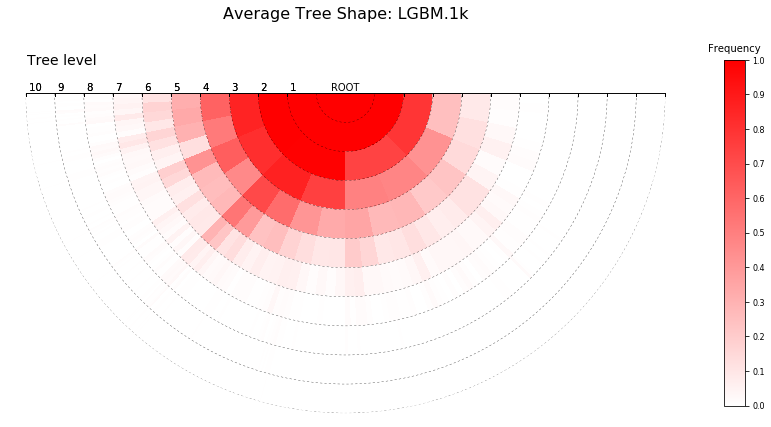

In [12]:
lgbm_1K_stats = topological_analysis(lgbm_1K, include_leaves=False)
fig, ax = plot_tree_shape(lgbm_1K_stats, max_level=10)

In [3]:
xbg_1k_file = "/home/rankeval/rankeval_data/msn/models/Fold1/msn1.xgboost.LAMBDAMART.1000.5.T1000.model"
xgb_1K = RTEnsemble(xbg_1k_file, name="XGB.1k", format="XGBoost")

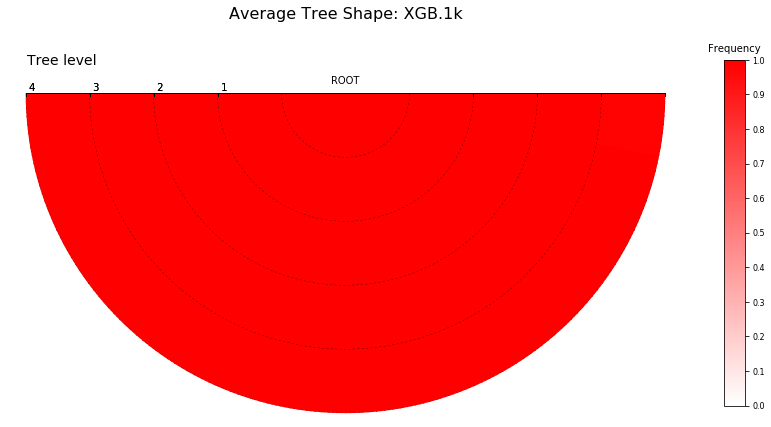

In [4]:
xgb_1K_stats = topological_analysis(xgb_1K, include_leaves=False)
fig, ax = plot_tree_shape(xgb_1K_stats, max_level=10)

We analyze the performance of the above models in the next tutorial: [RankEval - Statistical Analysis](RankEval%20-%20Statistical%20Analysis.ipynb).